In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

# Regression avec SKLEARN

## Regression linéaire

In [3]:
np.random.seed(0)
m = 100
x = np.linspace(0,10,m).reshape(m,1)
y = x + np.random.randn(m,1)

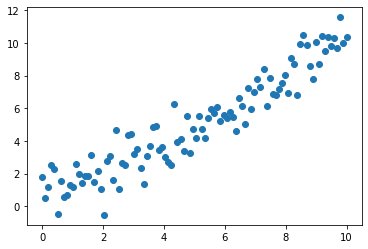

In [4]:
plt.scatter(x,y)
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model =LinearRegression()
model.fit(x,y)
model.score(x,y)

0.8881140743377214

In [7]:
predictions = model.predict(x)

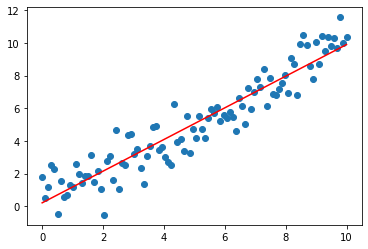

In [8]:
plt.scatter(x,y)
plt.plot(x,predictions, c='r')
plt.show()

## Regression non linéaire

In [9]:
np.random.seed(0)
m = 100
x = np.linspace(0,10,m).reshape(m,1)
y = x**2 + np.random.randn(m,1)

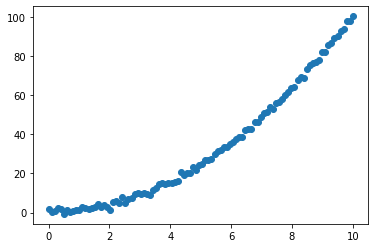

In [10]:
plt.scatter(x,y)
plt.show()

In [11]:
from sklearn.svm import SVR

In [12]:
model =SVR(C=1000)
model.fit(x,y)
model.score(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9990576606024864

In [13]:
predictions = model.predict(x)

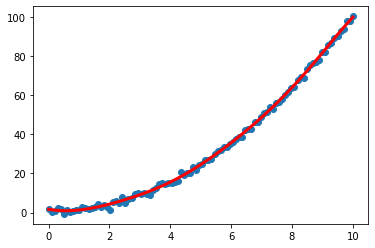

In [14]:
plt.scatter(x,y)
plt.plot(x,predictions, c='r', lw=3)
plt.show()

# Classification KNN

In [15]:
import pandas as pd

In [16]:
data = pd.read_excel('titanic.xls')

In [17]:
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [18]:
titanic = data[['pclass','survived','sex','age']]

In [19]:
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'],[0,1], inplace=True)
titanic.head()

<ipython-input-19-9fb5f7a7bb73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.dropna(axis=0, inplace=True)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,pclass,survived,sex,age
0,1,1,1,29.0000
1,1,1,0,0.9167
2,1,0,1,2.0000
3,1,0,0,30.0000
4,1,0,1,25.0000


In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
model =KNeighborsClassifier(n_neighbors=1)

In [22]:
y = titanic['survived']
x = titanic.drop('survived', axis=1)

In [23]:
model.fit(x,y)
model.score(x,y)

0.8432122370936902

In [24]:
def survie(model, pclass, sex, age):
    x = np.array([pclass, sex, age]).reshape(1,3)
    print(model.predict(x))
    print(model.predict_proba(x))
    if model.predict(x)[0]==0 :
        print('Malheuresement, vous ne surviverait pas au chavire du Titanic, avec une probabilité quasi-absolue.')
    else :
        print('Vous auriez la chance de survivre au chavire de Titanic.')

In [35]:
survie(model,2,1,41)

[1]
[[0. 1.]]
Vous auriez la chance de survivre au chavire de Titanic.


0.8432122370936902
1


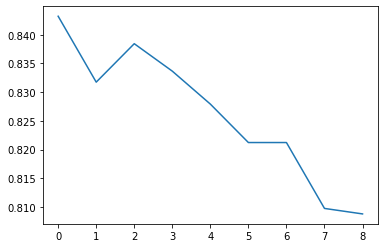

In [26]:
s = 0
neighbors = []
for i in range(1,10):
    model =KNeighborsClassifier(n_neighbors=i)
    model.fit(x,y)
    l = model.score(x,y)
    neighbors.append(l)
    if l > s :
        s = l
        a = i
print(s)
print(a)
plt.plot(neighbors)
plt.show()

In [27]:
model =KNeighborsClassifier(n_neighbors=a)
model.fit(x,y)
model.score(x,y)

0.8432122370936902